# VL2: Deskriptive Statistik – Lage, Streuung und Verteilungsform

### Set-Up

In [199]:
# Grundlegende Bibliotheken
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import numpy as np
import missingno as msno

# Einstellungen für bessere Plots
plt.rcParams['figure.figsize'] = (10, 6)

# Pandas Optionen
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.4f}'.format)

# Download latest version


path = kagglehub.dataset_download("priyamchoksi/credit-card-transactions-dataset")

ds = pd.read_csv(f"{path}/credit_card_transactions.csv")

print(f"Anzahl Zeilen: {ds.shape[0]}")
print(f"Anzahl Spalten: {ds.shape[1]}")

Anzahl Zeilen: 1296675
Anzahl Spalten: 24


# Lagekennzahlen

### Transaktionsbetrag

Zuerst untersuchen wir die Transaktionsbeträge auf die klassischen Lagekennzahlen:

In [200]:
amt = ds["amt"].dropna()

print("Mittelwert:", amt.mean())
print("Median:", amt.median())
print("Quantile (25%,50%,75%):", amt.quantile([0.25,0.5,0.75]).to_dict())
print("Modus:", amt.mode().tolist())
print("min, max:", amt.min(), amt.max())

q_low, q_high = amt.quantile(0.1), amt.quantile(0.9)
trimmed = amt[(amt >= q_low) & (amt <= q_high)].mean()
print("Trimmed Mean (10%):", trimmed)

Mittelwert: 70.35103545607032
Median: 47.52
Quantile (25%,50%,75%): {0.25: 9.65, 0.5: 47.52, 0.75: 83.14}
Modus: [1.14]
min, max: 1.0 28948.9
Trimmed Mean (10%): 49.83294629123474


Zu sehen ist die klare rechts-schiefe der Daten, da der Median viel kleiner als der Mittelwert ist. Dies liegt daran, dass die vielen hohen Werte den Mittelwert als nicht-robuste Lagekennzahl stark beeinflussen, während der Median als robuste Lagekennzahl davon unbeeindruckt ist. Lassen wir uns die Daten gleich mal grafisch zeigen: Einmal ein normaler Boxplot links, und rechts dann der log-transformierte Boxplot, da die Daten so rechts-schief sind.

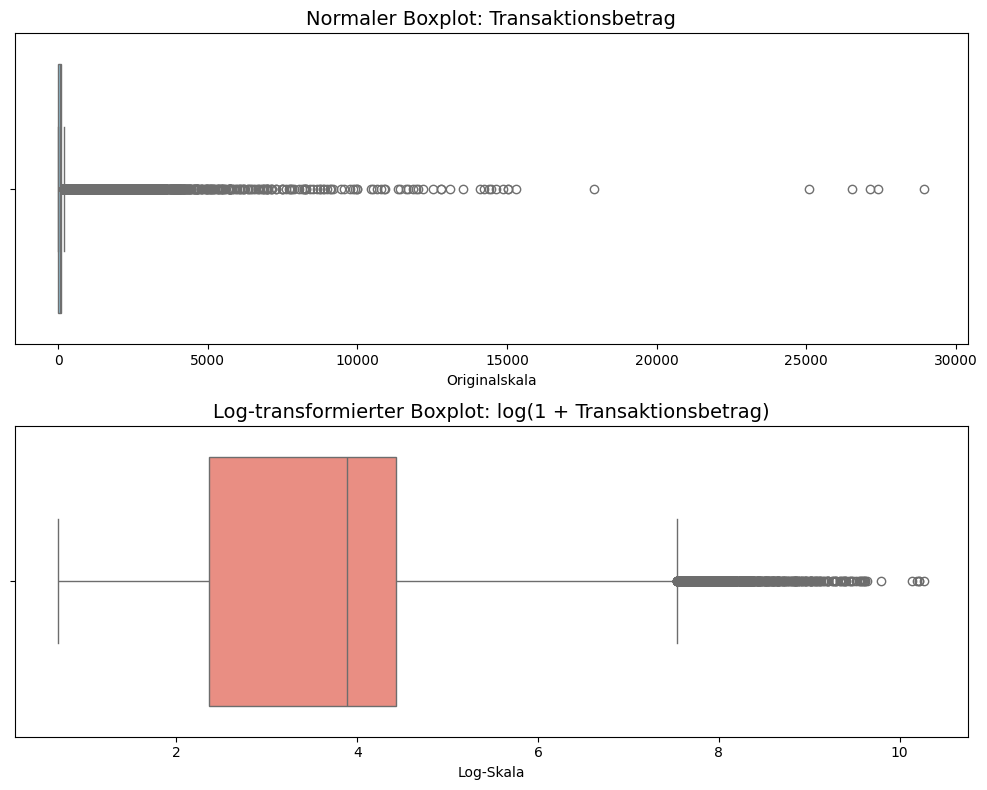

In [201]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

sns.boxplot(x=amt, ax=ax1, color='skyblue')
ax1.set_title(f'Normaler Boxplot: Transaktionsbetrag', fontsize=14)
ax1.set_xlabel('Originalskala')

# --- Plot 2: Log-transformiert ---
# Wir nutzen log1p (log(1+x)), um Probleme mit 0-Werten zu vermeiden
sns.boxplot(x=np.log1p(amt), ax=ax2, color='salmon')
ax2.set_title(f'Log-transformierter Boxplot: log(1 + Transaktionsbetrag)', fontsize=14)
ax2.set_xlabel('Log-Skala')

# Layout optimieren
plt.tight_layout()
plt.show()

Wir sehen direkt die extreme Rechtsschiefe im oberen Boxplot, er ist quasi nicht sichtbar, sondern nur die ganzen Ausreisser. Im unteren, log-transformierten Boxplot wird die Situation dann etwas deutlicher sichtbar. Aufgrund der Transformation können wir den Grossteil der Daten, d.h. den Boxplot, trotzdem noch einordnen.

### Alter

Als nächstes untersuchen wir dieselben Kennzahlen für die Spalter des Alters.

In [202]:
ds['dob'] = pd.to_datetime(ds['dob'])
ds['trans_date_trans_time'] = pd.to_datetime(ds['trans_date_trans_time'])

# 2. Alter berechnen (Differenz der Jahre)
ds['age'] = ds['trans_date_trans_time'].dt.year - ds['dob'].dt.year

age = ds["age"].dropna()

print("Mittelwert:", age.mean())
print("Median:", age.median())
print("Quantile (25%,50%,75%):", age.quantile([0.25,0.5,0.75]).to_dict())
print("Modus:", age.mode().tolist())
print("min, max:", age.min(), age.max())

q_low, q_high = age.quantile(0.1), age.quantile(0.9)
trimmed = age[(age >= q_low) & (age <= q_high)].mean()
print("Trimmed Mean (10%):", trimmed)

Mittelwert: 46.02929801222357
Median: 44.0
Quantile (25%,50%,75%): {0.25: 33.0, 0.5: 44.0, 0.75: 57.0}
Modus: [47]
min, max: 14 96
Trimmed Mean (10%): 44.57687722808021


Wir sehen also, dass die jüngste person 14 Jahre alt war zur Zeit der Transaktion, die älteste dagegen 96. Auch hier herrscht eine (jedoch viel weniger starke) Rechtsschiefe vor, der Mittelwert ist höher als der Median.

Text(0.5, 1.0, 'Boxplot des Alters')

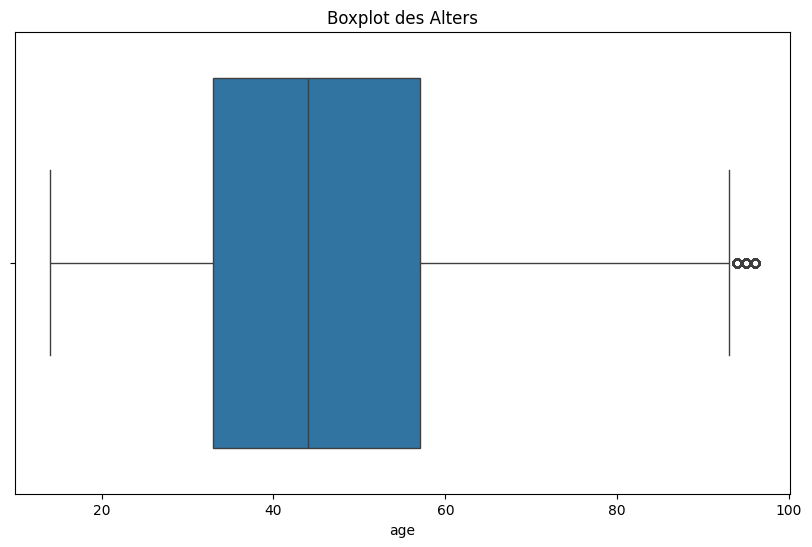

In [203]:
sns.boxplot(data=age, orient="h")
plt.title("Boxplot des Alters")

Augenscheinlich sind gemäss den Tukey Fences nur 3 Ausreisser zu sehen, ebenso ist die relativ leichte rechtsschiefe im Boxplot zu erkennen, denn der rechte Whisker ist länger, die Box liegt nicht normalverteilt in der Mitte.

### Unterschiede im Alter zwischen Geschlechtern

In [215]:
display(ds.groupby("gender")["age"].agg(["mean", "median", "std", "count"]).round(2))

,mean,median,std,count
gender,,,,
F,52.1400,49.9900,17.4900,709863
M,52.3500,50.4800,17.2700,586812


Wir sehen also eine ähnliche Altersverteilung, allerdings über 120 000 mehr Frauen-Records wie Männer-Records.

### Stadt-Populationen

In [219]:
pop = ds["city_pop"].dropna()

print("Mittelwert:", pop.mean())
print("Median:", pop.median())
print("Quantile (25%,50%,75%):", pop.quantile([0.25,0.5,0.75]).to_dict())
print("Modus:", pop.mode().tolist())
print("min, max:", pop.min(), pop.max())

q_low, q_high = pop.quantile(0.1), pop.quantile(0.9)
trimmed = pop[(pop >= q_low) & (pop <= q_high)].mean()
print("Trimmed Mean (10%):", trimmed)

Mittelwert: 88824.44056297839
Median: 2456.0
Quantile (25%,50%,75%): {0.25: 743.0, 0.5: 2456.0, 0.75: 20328.0}
Modus: [606]
min, max: 23 2906700
Trimmed Mean (10%): 16705.372055796055


Text(0.5, 1.0, 'Boxplot der Stadt-Populationen')

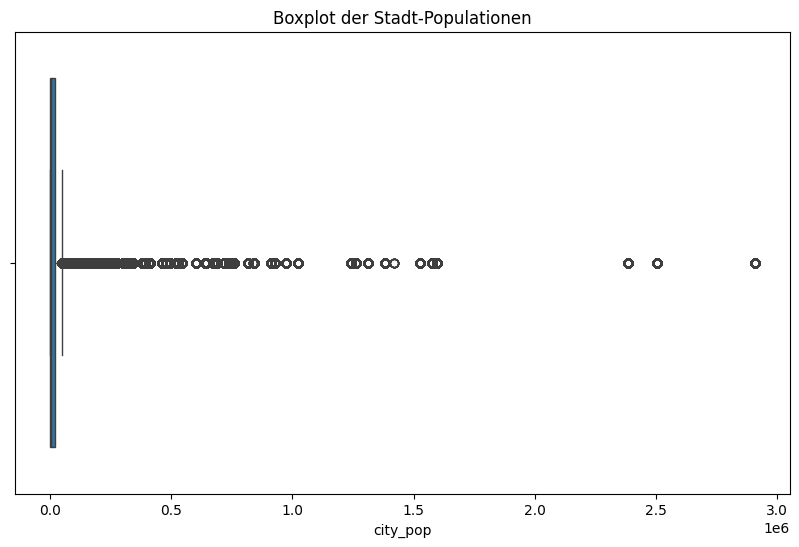

In [220]:
sns.boxplot(data=pop, orient="h")
plt.title("Boxplot der Stadt-Populationen")

Auch hier ist eine extreme rechtsschiefe zu sehen. Aufgrund der geografischen und demografischen Gegebenheiten der USA ist dies allerdings normal, wir werden deswegen auf diese Verteilung nicht mehr weiter eingehen bei der Analyse von Streuungskennzahlen sowie Ausreissern.

# Streuung

### Transaktionsbeträge

In [204]:
print("Varianz:", amt.var())
print("Standardabweichung:", amt.std())
iqr = amt.quantile(0.75) - amt.quantile(0.25)
mad = (amt - amt.median()).abs().median()
print("IQR:", iqr)
print("MAD:", mad)

Varianz: 25701.232223267565
Standardabweichung: 160.3160385715277
IQR: 73.49
MAD: 37.5


### Alter

In [205]:
print("Varianz:", age.var())
print("Standardabweichung:", age.std())
iqr = age.quantile(0.75) - age.quantile(0.25)
mad = (age - age.median()).abs().median()
print("IQR:", iqr)
print("MAD:", mad)

Varianz: 302.1468780653546
Standardabweichung: 17.382372624741265
IQR: 24.0
MAD: 12.0


# Ausreisserprüfung

### Klassisch: Z-Score

##### Alter

In [206]:
z = (age - age.mean()) / s.std()
outliers_z = age[abs(z) > 3]
z_lower = age.mean() - 3 * age.std()
z_upper = age.mean() + 3 * age.std()
print("Anzahl Ausreisser (Z-Score >3):", len(outliers_z))
print(f"Anteil der Ausreisser (Z-Score >3): {len(outliers_z)/len(age):.2f}%")

Anzahl Ausreisser (Z-Score >3): 0
Anteil der Ausreisser (Z-Score >3): 0.00%


##### Transaktionsbeträge

In [207]:
z = (amt - amt.mean()) / amt.std()
outliers_z = amt[abs(z) > 3]
z_lower = amt.mean() - 3 * amt.std()
z_upper = amt.mean() + 3 * amt.std()
print("Anzahl Ausreisser (Z-Score >3):", len(outliers_z))
print(f"Anteil der Ausreisser (Z-Score >3): {len(outliers_z)/len(amt):.2f}%")

Anzahl Ausreisser (Z-Score >3): 12738
Anteil der Ausreisser (Z-Score >3): 0.01%


### Tukey

##### Alter

In [208]:
q1 = age.quantile(0.25)
q3 = age.quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_tukey = age[(age < lower_bound) | (age > upper_bound)]


print("Tukey-Grenzen:")
print("Untere Grenze:", lower_bound)
print("Obere Grenze:", upper_bound)
print("Anzahl Ausreisser (Tukey 1.5×IQR):", len(outliers_tukey))
print(f"Anzahl Ausreisser (Tukey 1.5×IQR): {len(outliers_tukey)/len(age):.2f}%")

Tukey-Grenzen:
Untere Grenze: -3.0
Obere Grenze: 93.0
Anzahl Ausreisser (Tukey 1.5×IQR): 2258
Anzahl Ausreisser (Tukey 1.5×IQR): 0.00%


Spannend zu sehen ist das nun im eigentlich robusteren Mass Ausreisserkandidaten ausgegeben werden, während davor beim Z-Scoren anscheinend keine vorhanden waren. Wir denken dies liegt an der breiten Verteilung der Alterswerte aber vor allem auch an der "künstlichen" Aufblähung der Standardabweichung durch Ausreisser, welche in weiter aussen liegenden Grenzen im Z-Score wiederzufinden ist.

##### Transaktionsbeträge

In [209]:
q1 = amt.quantile(0.25)
q3 = amt.quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_tukey = amt[(amt < lower_bound) | (amt > upper_bound)]


print("Tukey-Grenzen:")
print("Untere Grenze:", lower_bound)
print("Obere Grenze:", upper_bound)
print("Anzahl Ausreisser (Tukey 1.5×IQR):", len(outliers_tukey))
print(f"Anzahl Ausreisser (Tukey 1.5×IQR): {len(outliers_tukey)/len(amt):.2f}%")

Tukey-Grenzen:
Untere Grenze: -100.58499999999998
Obere Grenze: 193.375
Anzahl Ausreisser (Tukey 1.5×IQR): 67290
Anzahl Ausreisser (Tukey 1.5×IQR): 0.05%


### Modifizierter Z-Score

##### Alter

In [210]:
median = age.median()
mad = (age - median).abs().median()
mod_z = 0.6745 * (age - median) / mad
outliers_modz = age[mod_z.abs() > 3.5]

k = (3.5 / 0.6745) * mad
modz_lower = median - k
modz_upper = median + k

print("Anzahl Ausreisser (mod. Z-Score >3.5):", len(outliers_modz))

Anzahl Ausreisser (mod. Z-Score >3.5): 0


##### Transaktionsbeträge

In [211]:
median = amt.median()
mad = (amt - median).abs().median()
mod_z = 0.6745 * (amt - median) / mad
outliers_modz = amt[mod_z.abs() > 3.5]

k = (3.5 / 0.6745) * mad
modz_lower = median - k
modz_upper = median + k

print("Anzahl Ausreisser (mod. Z-Score >3.5):", len(outliers_modz))

Anzahl Ausreisser (mod. Z-Score >3.5): 40359


### Grafische Darstellung der Ausreisser

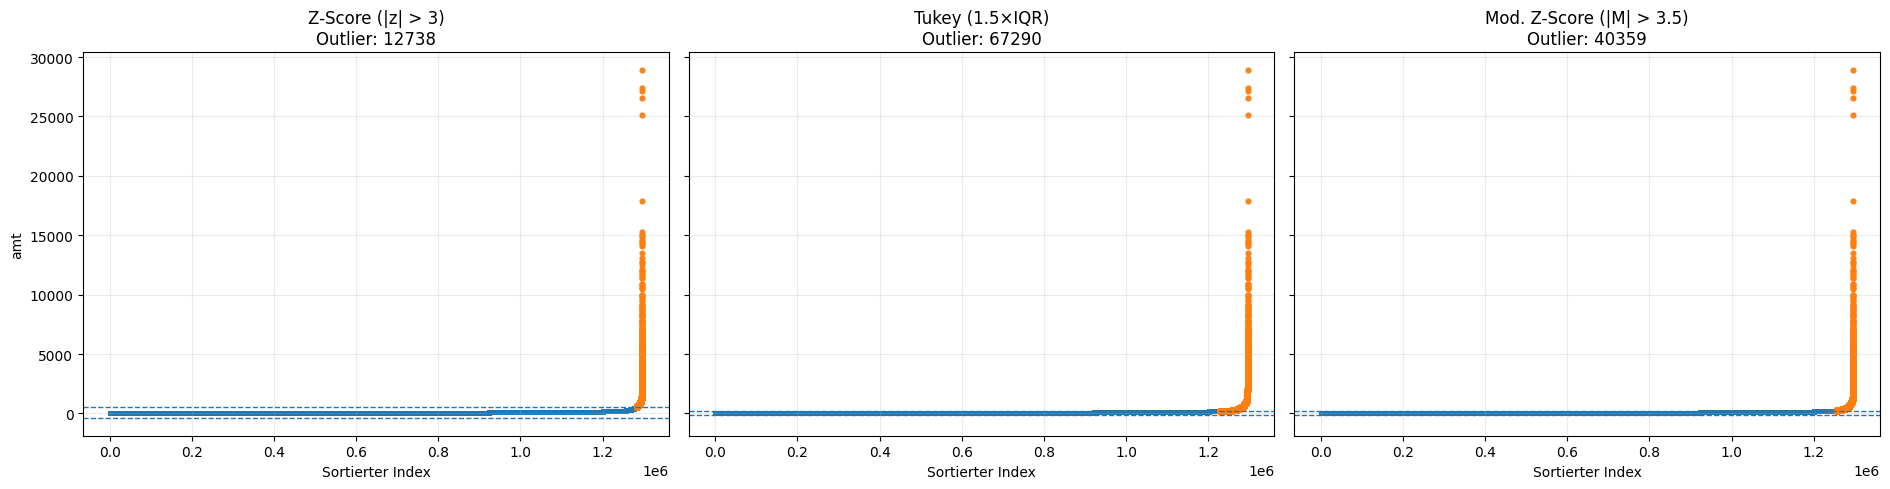

In [212]:
# Alle Punkte sortiert darstellen
s_sorted = amt.sort_values()
idx = np.arange(len(s_sorted))

# Masken: welche Indizes sind Outlier?
mask_z = s_sorted.index.isin(outliers_z.index)
mask_tukey = s_sorted.index.isin(outliers_tukey.index)
mask_modz = s_sorted.index.isin(outliers_modz.index)

fig, axes = plt.subplots(1, 3, figsize=(19, 5), sharey=True)

def plot_outliers(ax, title, mask, lower, upper):
    ax.scatter(idx, s_sorted.values, s=6, alpha=0.35)
    # Ausreisser markieren (drunter oder drüber)
    ax.scatter(idx[mask], s_sorted.values[mask], s=12, alpha=0.9)

    # Grenzen einzeichnen
    ax.axhline(lower, linestyle="--", linewidth=1)
    ax.axhline(upper, linestyle="--", linewidth=1)

    ax.set_title(title)
    ax.set_xlabel("Sortierter Index")
    ax.grid(alpha=0.25)

axes[0].set_ylabel("amt")

plot_outliers(
    axes[0],
    f"Z-Score (|z| > 3)\nOutlier: {len(outliers_z)}",
    mask_z,
    z_lower,
    z_upper
)

plot_outliers(
    axes[1],
    f"Tukey (1.5×IQR)\nOutlier: {len(outliers_tukey)}",
    mask_tukey,
    lower_bound,
    upper_bound
)

plot_outliers(
    axes[2],
    f"Mod. Z-Score (|M| > 3.5)\nOutlier: {len(outliers_modz)}",
    mask_modz,
    modz_lower,
    modz_upper
)

plt.tight_layout()
plt.show()

Wir sehen hier die von links nach rechts immer robuster werdenden Streuungskennzahlen und in orange die dadurch markierten Ausreisserkandidaten. Wir sehen, dass die robusten Kennzahlen mehr Ausreisser markieren, sie spiegeln auch die wahre Streuung der Daten besser wieder. Die weniger robuste Kennzahl Z-Score wird von den Ausreissern "gekidnappt", die Grenzen werden so weiter nach aussen verschoben, die Ausreisser wirken schon fast wieder normal. Es wird also klar, weshalb der klassische Z-Score nur bei Normalverteilung sinnvoll ist.

### Erkenntnisse der Ausreisserprüfung & Umgang mit Ausreisser-Kandidaten

Die Analyse der Transaktionsbeträge (*amt*) zeigt eine stark rechtsschiefe Verteilung mit einer ausgeprägten Heavy-Tail-Struktur. Hohe Beträge treten selten, aber regelmäßig auf und dominieren die rechte Seite der Verteilung.

Der klassische Z-Score (|z| > 3) identifiziert 12 738 Beobachtungen als Ausreisser. Der modifizierte Z-Score (|M| > 3.5), der robuster gegenüber
Schiefe ist, klassifiziert mit 40 359 Beobachtungen einen deutlich größeren Anteil als Ausreisser. Die Tukey-Methode (1.5 × IQR) ist am sensitivsten und
identifiziert 67 290 Ausreisser, ausschließlich im oberen Bereich der Verteilung.

Die Unterschiede zwischen den Methoden zeigen, dass die identifizierten Ausreisser keine offensichtlichen Datenfehler sind. Es handelt sich vielmehr
um sehr hohe, aber realistische Transaktionsbeträge, so genannte Heavy Tails. Solche Extremwerte sind typisch für reale Kreditkartendaten und können für die spätere Analyse der
Betrugsfälle wichtige Informationen enthalten. Deswegen werden die Transaktionsbeträge werden jedoch unverändert im Datensatz belassen, um die vollständige Informationsbasis zu erhalten. Allerdings werden wir zur besseren Visualisierung und Analyse der stark rechtsschiefen Verteilung in den folgenden Notebooks meist logarithmische Darstellungen für den Transaktionsbetrag verwenden.

### Verteilungsform (in VL3 (Analyse_3.ipynb) genauer)

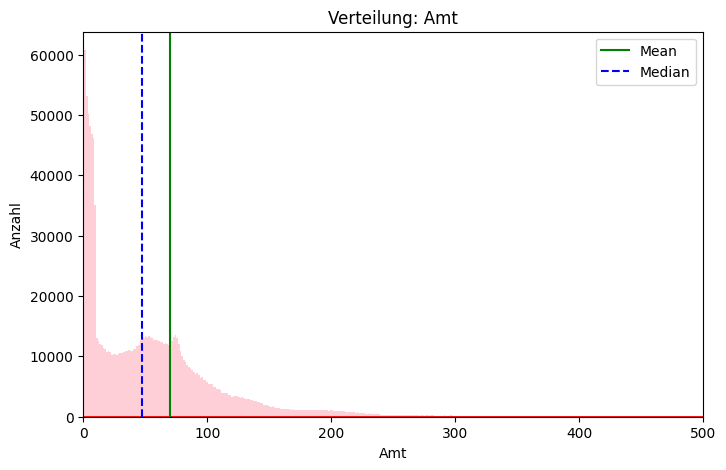

In [218]:
plt.figure(figsize=(8,5))

# Histogramm mit normalen Häufigkeiten (Counts)
sns.histplot(amt, bins="fd", color="pink", edgecolor="purple", stat="count")

# KDE separat in anderer Farbe
sns.kdeplot(amt, color="red", lw=2)

# Mittelwert und Median einzeichnen
plt.axvline(amt.mean(), color="green", linestyle="-", label="Mean")
plt.axvline(amt.median(), color="blue", linestyle="--", label="Median")

plt.title("Verteilung: Amt")
plt.xlabel("Amt")
plt.ylabel("Anzahl")
plt.xlim(0, 500) # Begrenzung des x-Achsenbereichs
plt.legend()
plt.show()

# Histogramm-Analyse: Binwahl

Wir testen verschiedene Anzahl Bins, um die Unterschiede der Darstellung zu sehen sowie mögliche Risiken aufzuzeigen.

Histogramm mit Anzahl Bins nach Daumenregel:


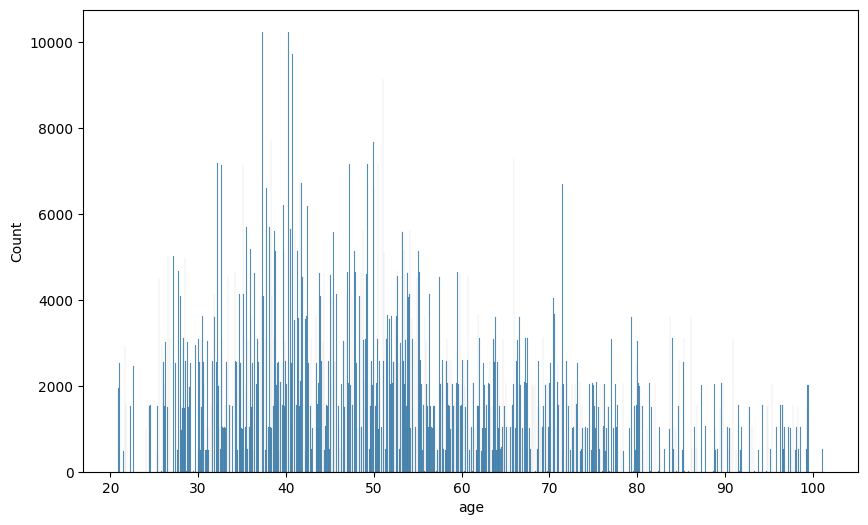

Histogramm mit Anzahl Bins nach Sturges:


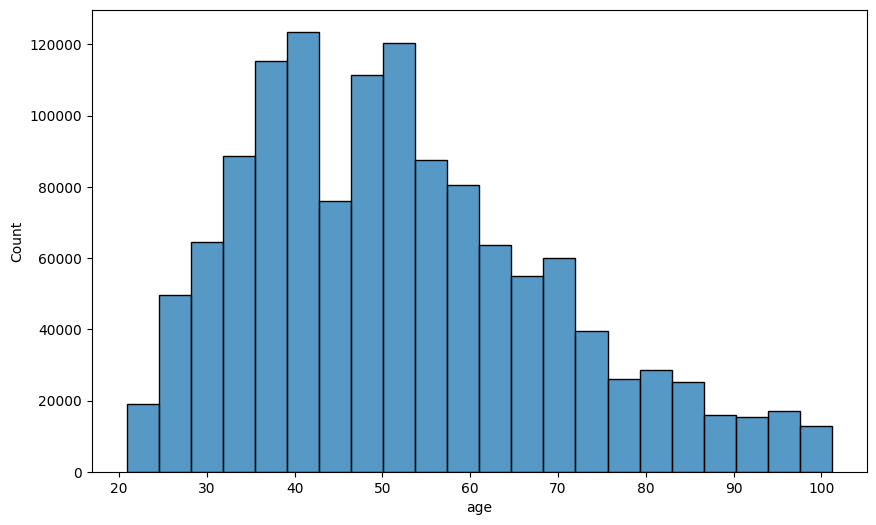

Histogramm mit Anzahl Bins nach Freedman-Diaconis:


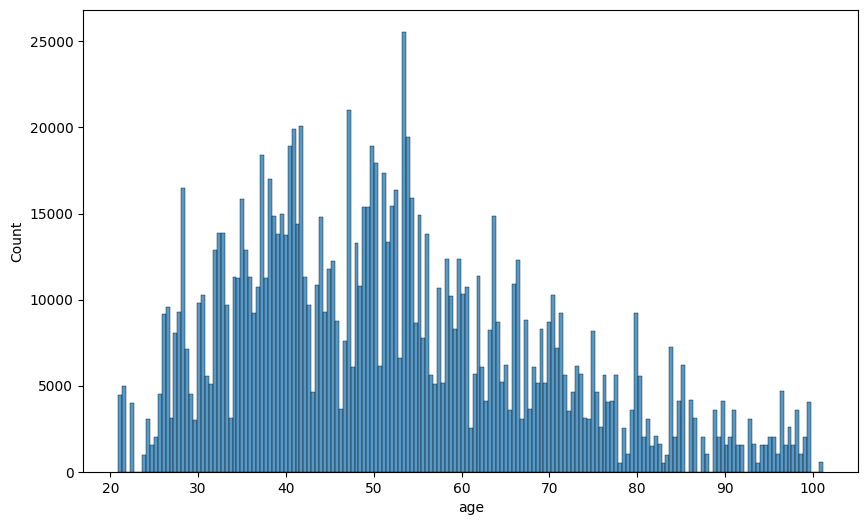

In [216]:
import math

age = ds["age"].dropna()
n = age.shape[0]

# Bins nach Daumenregel
print("Histogramm mit Anzahl Bins nach Daumenregel:")
bins_daumenregel = math.ceil(math.sqrt(n))
sns.histplot(age, bins=bins_daumenregel)
plt.show()

# Bins nach Sturges
print("Histogramm mit Anzahl Bins nach Sturges:")
bins_sturges = math.ceil(math.log2(n) + 1)
sns.histplot(age, bins=bins_sturges)
plt.show()

# Bins nach Freedman-Diaconis
print("Histogramm mit Anzahl Bins nach Freedman-Diaconis:")
sns.histplot(age, bins='fd')
plt.show()

Die Unterschiede sind sofort zu sehen: Während das Histogramm mit Bins nach Daumenregel zu viele Bins gewählt hat, wodurch die eigentliche Struktur bzw. Verteilung der Daten gar nicht mehr wirklich klar wird, sehen wir bei Sturges schon fast eine Übervereinfachung durch recht wenige Bins. Die allgemeine Verteilung der Daten wird klar, aber es gehen einige Details verloren bzw. werden "weggelättet". Bei Freedman-Diaconis, dem in der Praxis am meisten verwendeten Mass für die Wahl der Anzahl Bins, sehen wir einen Mittelweg zwischen den beiden anderen Regeln. Wir finden, ein Mittelweg aus FD und Sturges wäre wahrscheinlich das optimalste Histogramm, um direkt einen Eindruck zur generellen Verteilung zu erhalten, und trotzdem nicht zu viele Details zu verlieren.

# KDE-Analyse: Bandbreiten

Als nächstes machten wir eine ähnliche Analyse für KDEs, wir verglichen die visuelle Erscheinung mit der Bandbreite berechnet nach Scott und Silverman.

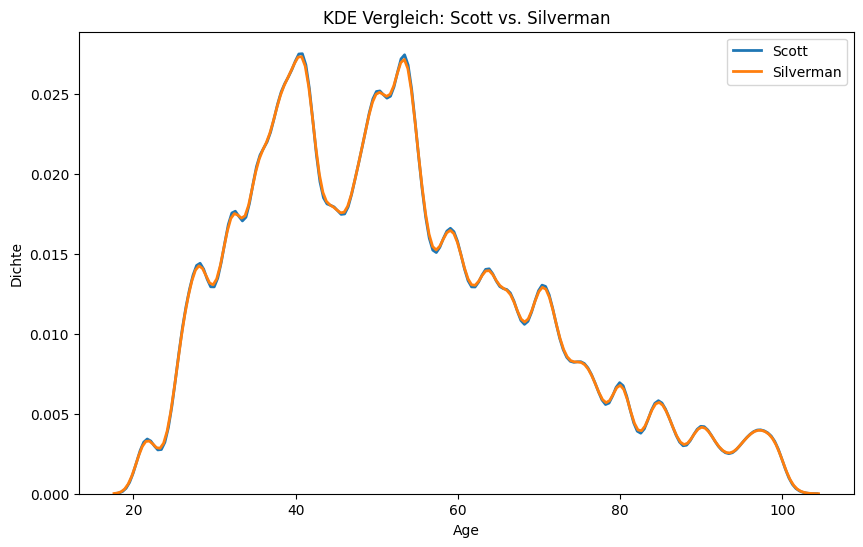

In [217]:
# Scott
sns.kdeplot(age, bw_method="scott",label="Scott", linewidth=2)

# Silverman
sns.kdeplot(age,bw_method="silverman",label="Silverman", linewidth=2)

plt.title("KDE Vergleich: Scott vs. Silverman")
plt.xlabel("Age")
plt.ylabel("Dichte")
plt.legend()
plt.show()

Wir sehen nur sehr wenige klare Unterschiede, diese liegen vor allem in Bereichen von schärferen Krümmungen wie lokale Maxima und Minima. Dort ist zu beobachten, dass Silverman diese stärker "curved", d.h. abrundet, während Scott etwas eckiger und somit aber auch detaillierter diese Veränderungen in der Verteilung abbildet.